<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [63]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [27]:
breast_csv = pd.read_csv('D:\IOD Data/data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [41]:
# ANSWER
breast_cancer_csv.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [52]:
b2 = breast_csv.drop('diagnosis', 1)

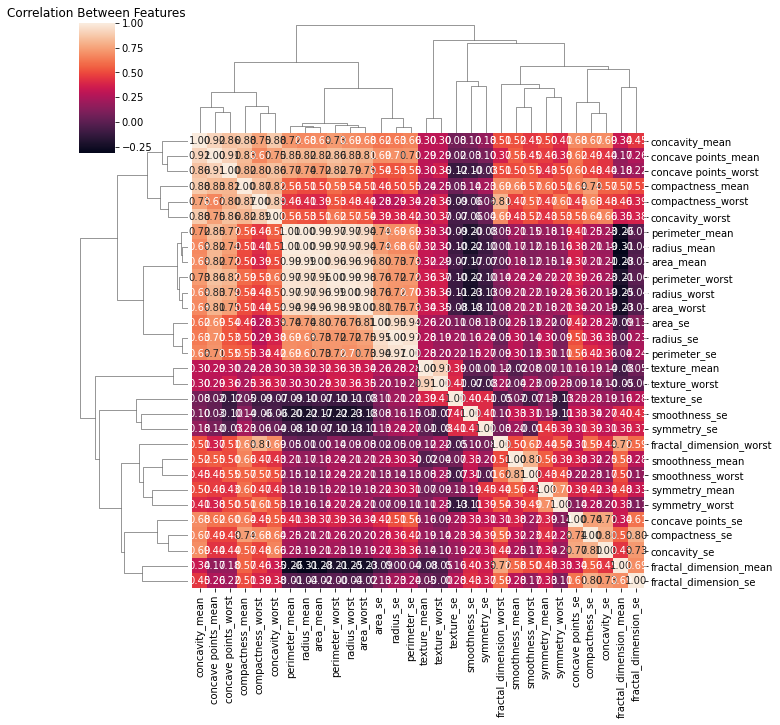

In [46]:
# ANSWER

corr_data = b2.corr() 
corr_mat = sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show()

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [50]:
# ANSWER
np.linalg.eig(corr_data)

(array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
        1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
        4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
        2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
        5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
        7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
        1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
        3.11594025e-02, 2.99728939e-02]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
         -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
         -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
         -2.11194013e-01, -1.31526

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [81]:
def calculate_cum_var_exp(eig_vals):

  
    data = np.array(b2)
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    C = corrcoef(data, rowvar=0)
    w, v = linalg.eig(C)
    print("Using numpy.linalg.eig")
    print(w)
    print(v)
    
    return cum_var_exp

In [82]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [74]:
# ANSWER
# Create an instance of PCA
scaler=StandardScaler()
scaler.fit(b2)
X_scaled=scaler.transform(b2)
print("After Scaling Minimum", X_scaled.min(axis=0)) 
pca=PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("Shape of X_pca", X_pca.shape)

# Fit Xs

After Scaling Minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]
Shape of X_pca (569, 3)


In [0]:
# ANSWER
# Plot explained_variance_

In [0]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

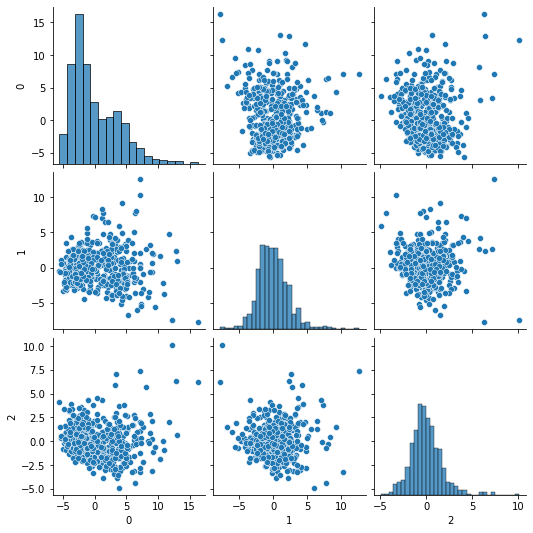

In [73]:
# ANSWER
# Create PairPlot of PCA
x2 = pd.DataFrame(X_pca)
sns.pairplot(x2)

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [0]:
# ANSWER
# Split Data

In [0]:
# ANSWER

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



